In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:

# 1. 데이터 로딩 및 전처리
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1)).astype('float32')  # (n_samples, 64)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:

# NumPy → PyTorch 텐서
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test  = torch.tensor(X_test)
y_test  = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(X_train, y_train)
test_ds  = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32)

In [15]:

# 2. 모델 정의
class DigitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

model = DigitNet()

In [17]:
# 3. 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [19]:
# 4. 학습 루프
num_epochs = 10
for epoch in range(1, num_epochs+1):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}/{num_epochs} — Loss: {avg_loss:.4f}")

Epoch 1/10 — Loss: 1.1593
Epoch 2/10 — Loss: 0.2763
Epoch 3/10 — Loss: 0.1427
Epoch 4/10 — Loss: 0.1116
Epoch 5/10 — Loss: 0.0736
Epoch 6/10 — Loss: 0.0519
Epoch 7/10 — Loss: 0.0412
Epoch 8/10 — Loss: 0.0331
Epoch 9/10 — Loss: 0.0248
Epoch 10/10 — Loss: 0.0190


In [21]:
# 5. 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        pred = out.argmax(dim=1)
        total += yb.size(0)
        correct += (pred == yb).sum().item()
print(f"\nTest Accuracy: {correct/total:.4f}")


Test Accuracy: 0.9778


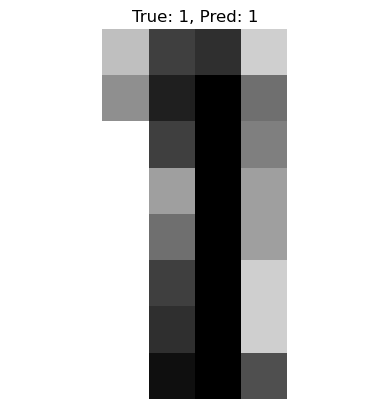

In [23]:
# 6. 예시 시각화
idx = 10
plt.imshow(X_test[idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True: {y_test[idx].item()}, Pred: {model(X_test[idx].unsqueeze(0)).argmax():d}")
plt.axis('off')
plt.show()